<a href="https://colab.research.google.com/github/eapost/NeuralNetworkAssignment/blob/master/most_frequent_ids.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np
import csv
mydata = pd.read_csv("/content/drive/My Drive/NeuralNetwork/subset.csv")
mydata.head()

,id,url,landmark_id
0,0682a33e8af5c4e5,http://lh3.ggpht.com/-E8m7WWrCkew/S3Fl9AeFxqI/...,6051
1,97dfb5153c85cbf3,http://lh4.ggpht.com/-ZKrBDt_aabU/SBS-_QPe7kI/...,6051
2,d6026632171c3e69,https://lh3.googleusercontent.com/-KS8DPSkvxGc...,6051
3,2908ff77fe8e2d44,https://lh6.googleusercontent.com/-JCMo6zTs_7c...,6051
4,c6430885167b753e,http://lh5.ggpht.com/-ot7x8UD71MU/TOZKMk90FPI/...,6051


In [0]:
rank_number = 50 # Number of top most frequent landmark_id for image selection
sampling_rate = 1 # fraction of images from each landmark_id
random_state = 17 # for reproducibility

landmarks=mydata.groupby(by='landmark_id').count().loc[:,'id']
l = landmarks.sort_values(ascending=False)

#l=landmarks.sample(frac=1,random_state=random_state)
lmks = pd.concat([l, l/l.sum(), l.cumsum()/l.sum()], axis=1, ignore_index=True)
lmks.columns=['Count', 'Proportion', 'CumSum']
ranked = lmks[0:rank_number]

mydata_ordered = mydata[mydata.landmark_id.isin(ranked.index)]
sample_gby = mydata_ordered.groupby(by='landmark_id').apply(lambda x: x.sample(frac=sampling_rate, random_state=random_state))
sample_idx = sample_gby.index.levels[1]
mydata_sample = df.iloc[sample_idx, :]

# write to csv file
mydata_sample.to_csv('mydata_sample.csv', index=False, quoting=csv.QUOTE_NONNUMERIC)
mydata_sample_mydata = pd.read_csv('mydata_sample.csv')

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

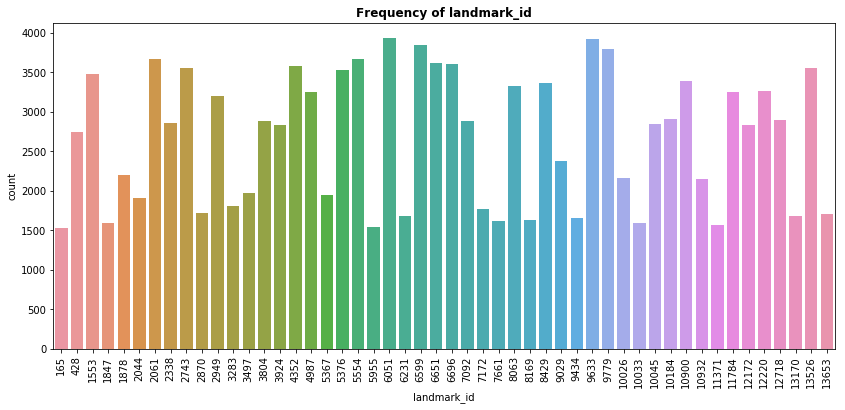

In [0]:
plt.figure(figsize = (14, 6))
g = sns.countplot(x="landmark_id", data=df_sample)
g.set_title("Frequency of landmark_id", fontweight="bold", fontsize=12)
plt.xticks(rotation=90)
plt.show()